## **Practical No: 2**

## **AIM:** Build a machine learning model on hand written digits and compare the models using evaluation techniques.

### **CODE and OUTPUT**

https://python-course.eu/machine-learning/training-and-testing-with-mnist.php

In [1]:
from keras.datasets import mnist

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
image_size =28
no_of_different_labels = 10
image_pixels = image_size * image_size

In [4]:
data="mnist.load_data()"
train=np.loadtxt('/content/drive/MyDrive/Colab Notebooks/Dataset/mnist_train.csv', delimiter=",")
test=np.loadtxt('/content/drive/MyDrive/Colab Notebooks/Dataset/mnist_test.csv', delimiter=",")

In [5]:
test[:10]

array([[7., 0., 0., ..., 0., 0., 0.],
       [2., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [9., 0., 0., ..., 0., 0., 0.],
       [5., 0., 0., ..., 0., 0., 0.],
       [9., 0., 0., ..., 0., 0., 0.]])

In [6]:
# normalization

test[test==255]
test.shape

(10000, 785)

In [7]:
# 99% accuracy

fac = 0.99 / 255
train_img = np.asfarray(train[:,1:])* fac + 0.01
test_img = np.asfarray(test[:,1:])* fac + 0.01

In [8]:
train_label = np.asfarray(train[:,:1])
test_label = np.asfarray(test[:,:1])

In [9]:
import numpy as np

In [10]:
# learning rate

lr = np.arange(10)

for label in range(10):
  one_hot = (lr==label).astype(np.int)
  print("label: ", label, " in one-hot representation: ", one_hot)

label:  0  in one-hot representation:  [1 0 0 0 0 0 0 0 0 0]
label:  1  in one-hot representation:  [0 1 0 0 0 0 0 0 0 0]
label:  2  in one-hot representation:  [0 0 1 0 0 0 0 0 0 0]
label:  3  in one-hot representation:  [0 0 0 1 0 0 0 0 0 0]
label:  4  in one-hot representation:  [0 0 0 0 1 0 0 0 0 0]
label:  5  in one-hot representation:  [0 0 0 0 0 1 0 0 0 0]
label:  6  in one-hot representation:  [0 0 0 0 0 0 1 0 0 0]
label:  7  in one-hot representation:  [0 0 0 0 0 0 0 1 0 0]
label:  8  in one-hot representation:  [0 0 0 0 0 0 0 0 1 0]
label:  9  in one-hot representation:  [0 0 0 0 0 0 0 0 0 1]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


In [11]:
lr = np.arange(no_of_different_labels)

train_labels_one_hot = (lr==train_label).astype(float)
test_labels_one_hot = (lr==test_label).astype(float)

In [12]:
train_labels_one_hot

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [13]:
train_labels_one_hot[train_labels_one_hot==0] = 0.01
train_labels_one_hot[train_labels_one_hot==1] = 0.99
test_labels_one_hot[test_labels_one_hot==0] = 0.01
test_labels_one_hot[test_labels_one_hot==1] = 0.99

In [14]:
train_labels_one_hot

array([[0.01, 0.01, 0.01, ..., 0.01, 0.01, 0.01],
       [0.99, 0.01, 0.01, ..., 0.01, 0.01, 0.01],
       [0.01, 0.01, 0.01, ..., 0.01, 0.01, 0.01],
       ...,
       [0.01, 0.01, 0.01, ..., 0.01, 0.01, 0.01],
       [0.01, 0.01, 0.01, ..., 0.01, 0.01, 0.01],
       [0.01, 0.01, 0.01, ..., 0.01, 0.99, 0.01]])

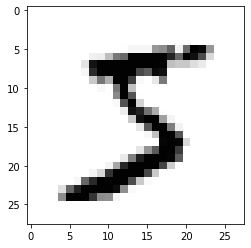

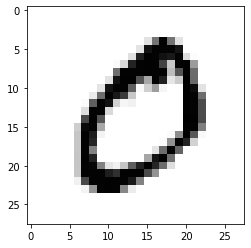

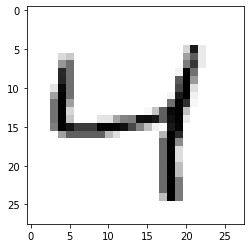

In [15]:
for i in range(3):
  img = train_img[i].reshape((28,28))
  plt.imshow(img, cmap="Greys")
  plt.show()

In [16]:
# dumping 

import pickle

with open("pickled_mnist.pkl", "bw") as fh:
  data = (train_img, test_img, train_label, test_label)
  pickle.dump(data, fh)

In [17]:
with open("pickled_mnist.pkl", "br") as fh:
  data = pickle.load(fh)

train_img = data[0]
test_img = data[1]
train_label = data[2]
test_label = data[3]

In [18]:
train_labels_one_hot = (lr==train_label).astype(float)
test_labels_one_hot = (lr==test_label).astype(float)

In [19]:
# data is Y values
# images is X values

image_size = 28
no_of_different_labels = 10
image_pixels = image_size * image_size

In [20]:
@np.vectorize
def sigmoid(x):
    return 1 / (1 + np.e ** -x)
activation_function = sigmoid

In [21]:
# L1 norm = lasso, distance
# L2 norm = ridge

from scipy.stats import truncnorm

In [22]:
# z-score 
# truncate = to abruptly stop

# like z-score
# z = lower limit - mu / sigma
# z = upper limit - mu / sigma

def truncated_normal(mean=0, sd=1, low=0, upp=10):
    return truncnorm((low - mean) / sd, # 0
                     (upp - mean) / sd, # 10
                     loc=mean, # 0
                     scale=sd) # intervals (_|_|_|_|_)

In [23]:
# In graph NN is nodes

In [24]:
class NeuralNetwork:
  def __init__(self, no_of_in_nodes, no_of_out_nodes, no_of_hidden_nodes, 
               learning_rate):
    self.no_of_in_nodes = no_of_in_nodes
    self.no_of_out_nodes = no_of_out_nodes
    self.no_of_hidden_nodes = no_of_hidden_nodes
    self.learning_rate = learning_rate 
    self.create_weight_matrices()

  def create_weight_matrices(self):
    rad = 1 / np.sqrt(self.no_of_in_nodes)
    X = truncated_normal(mean=0, sd=1, low=-rad, upp=rad)
    self.wih = X.rvs((self.no_of_hidden_nodes, self.no_of_in_nodes))
    rad = 1 / np.sqrt(self.no_of_hidden_nodes)
    X = truncated_normal(mean=0, sd=1, low=-rad, upp=rad)
    self.who = X.rvs((self.no_of_out_nodes, self.no_of_hidden_nodes))
  
  def train(self, input_vector, target_vector):
        input_vector = np.array(input_vector, ndmin=2).T
        target_vector = np.array(target_vector, ndmin=2).T
        
        output_vector1 = np.dot(self.wih, 
                                input_vector)
        output_hidden = activation_function(output_vector1)
        
        output_vector2 = np.dot(self.who, 
                                output_hidden)
        output_network = activation_function(output_vector2)
        
        output_errors = target_vector - output_network
        # update the weights:
        tmp = output_errors * output_network \
              * (1.0 - output_network)     
        tmp = self.learning_rate  * np.dot(tmp, 
                                           output_hidden.T)
        self.who += tmp

        # calculate hidden errors:
        hidden_errors = np.dot(self.who.T, 
                               output_errors)
        # update the weights:
        tmp = hidden_errors * output_hidden * \
              (1.0 - output_hidden)
        self.wih += self.learning_rate \
                          * np.dot(tmp, input_vector.T)
      
  def run(self, input_vector):
        # input_vector can be tuple, list or ndarray
        input_vector = np.array(input_vector, ndmin=2).T

        output_vector = np.dot(self.wih, 
                               input_vector)
        output_vector = activation_function(output_vector)
        
        output_vector = np.dot(self.who, 
                               output_vector)
        output_vector = activation_function(output_vector)
    
        return output_vector
            
  def confusion_matrix(self, data_array, labels):
        cm = np.zeros((10, 10), int)
        for i in range(len(data_array)):
            res = self.run(data_array[i])
            res_max = res.argmax()
            target = labels[i][0]
            cm[res_max, int(target)] += 1
        return cm    

  def precision(self, label, confusion_matrix):
        col = confusion_matrix[:, label]
        return confusion_matrix[label, label] / col.sum()
    
  def recall(self, label, confusion_matrix):
        row = confusion_matrix[label, :]
        return confusion_matrix[label, label] / row.sum()
            
  def evaluate(self, data, labels):
        corrects, wrongs = 0, 0
        for i in range(len(data)):
            res = self.run(data[i])
            res_max = res.argmax()
            if res_max == labels[i]:
                corrects += 1
            else:
                wrongs += 1
        return corrects, wrongs

In [25]:
ANN = NeuralNetwork(no_of_in_nodes = image_pixels, 
                    no_of_out_nodes = 10, 
                    no_of_hidden_nodes = 100,
                    learning_rate = 0.1)
    
    
for i in range(len(train_img)):
    ANN.train(train_img[i], train_labels_one_hot[i])

In [26]:
for i in range(20):
    res = ANN.run(test_img[i])
    print(test_label[i], np.argmax(res), np.max(res))

[7.] 7 0.9980909413607943
[2.] 2 0.9477641917199876
[1.] 1 0.998825366511938
[0.] 0 0.9910042636189821
[4.] 4 0.9838891024176891
[1.] 1 0.998637663111031
[4.] 4 0.9971419716588876
[9.] 9 0.9873422232112278
[5.] 6 0.3056093151861299
[9.] 9 0.990874606270664
[0.] 0 0.9921132424447265
[6.] 6 0.663162805269596
[9.] 9 0.9928241821666016
[0.] 0 0.9981203412621739
[1.] 1 0.9993004343045305
[5.] 5 0.9809454637423782
[9.] 9 0.9979567958561494
[7.] 7 0.9968419155763278
[3.] 3 0.8129489515050061
[4.] 4 0.9983820758312743


In [27]:
corrects, wrongs = ANN.evaluate(train_img, train_label)
print("accuracy train: ", corrects / ( corrects + wrongs))
corrects, wrongs = ANN.evaluate(test_img, test_label)
print("accuracy: test", corrects / ( corrects + wrongs))

cm = ANN.confusion_matrix(train_img, train_label)
print(cm)

for i in range(10):
    print("digit: ", i, "precision: ", ANN.precision(i, cm), "recall: ", 
          ANN.recall(i, cm))

accuracy train:  0.9467833333333333
accuracy: test 0.9467
[[5798    1   32   16   13   34   37   18   17   24]
 [   2 6624   49   24   15   35   27   49  123   14]
 [   5   21 5540   58   14   12    4   48   16    8]
 [  11   42   96 5788    6   85    3   29  170   77]
 [   9   12   61    7 5457   43   12   50   34   73]
 [   7    6    5  103    1 5035   52    5   30   13]
 [  31    2   44   20   43   52 5741    2   25    3]
 [   0    5   42   43    5    5    0 5843    4   27]
 [  46   13   75   39    9   69   42   17 5287   16]
 [  14   16   14   33  279   51    0  204  145 5694]]
digit:  0 precision:  0.9788958298159717 recall:  0.9679465776293823
digit:  1 precision:  0.9824977751409077 recall:  0.9514507325481184
digit:  2 precision:  0.9298422289358845 recall:  0.9675165909884736
digit:  3 precision:  0.9440548034578372 recall:  0.9177104804185825
digit:  4 precision:  0.9340979116740842 recall:  0.9477249044807224
digit:  5 precision:  0.9287954251983029 recall:  0.95777059159216

In [28]:
epochs = 3

NN = NeuralNetwork(no_of_in_nodes = image_pixels, 
                   no_of_out_nodes = 10, 
                   no_of_hidden_nodes = 100,
                   learning_rate = 0.1)

for epoch in range(epochs):  
    print("epoch: ", epoch)
    for i in range(len(train_img)):
        NN.train(train_img[i], 
                 train_labels_one_hot[i])
  
    corrects, wrongs = NN.evaluate(train_img, train_label)
    print("accuracy train: ", corrects / ( corrects + wrongs))
    corrects, wrongs = NN.evaluate(test_img, test_label)
    print("accuracy: test", corrects / ( corrects + wrongs))

epoch:  0
accuracy train:  0.9440166666666666
accuracy: test 0.9446
epoch:  1
accuracy train:  0.9634666666666667
accuracy: test 0.9581
epoch:  2
accuracy train:  0.97015
accuracy: test 0.9645
